In [3]:
import time
import datetime
import pandas as pd

from matplotlib import pyplot as plt

### variablen

In [17]:
# rolling_window1 = 10
# rolling_window2 = 100

# aktie = 'H4ZJ.DE'
# HSBC MSCI World ETF
# n_aktie = 133.636
# EP_Aktie = 27.451

# aktie = 'E127.MI'
# n_aktie = 6.258
# EP_Aktie = 47.942

aktie = 'LHA.DE'
n_aktie = 148
EP_Aktie = 6.379

### YYYY, M, D, h, s
period1 = int(time.mktime(datetime.datetime(2021, 10, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 12, 30, 23, 59).timetuple()))
interval = '1d' # 1d, 1wk, 1m 

dict_aktien = {
    '1': 'LHA.DE',
    '2': 'H4ZJ.DE',
    '3': 'E127.MI'}

dict_n_aktien = {
    'LHA.DE': 148,
    'H4ZJ.DE': 133.636,
    'E127.MI': 6.258}

dict_EP_aktien = {
    'LHA.DE': 6.379,
    'H4ZJ.DE': 27.451,
    'E127.MI': 47.942}


In [20]:
for key in dict_EP_aktien:
    print(key, '->', dict_EP_aktien[key])

LHA.DE -> 6.379
H4ZJ.DE -> 27.451
E127.MI -> 47.942


In [30]:
# # dict ticker

# dict_ticker = {
#     1: 'TSLA',
#     2: 'abc'
# }

# for key in dict_ticker:
#     print(key, '->', dict_ticker[key])

In [31]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{aktie}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [32]:
print(query_string)

https://query1.finance.yahoo.com/v7/finance/download/LHA.DE?period1=1633125540&period2=1672441140&interval=1d&events=history&includeAdjustedClose=true


### dataframe

In [33]:
df = pd.read_csv(query_string)

### calculations

In [34]:

df['Kurs'] = (1/2)*( df["Low"]+df["High"] )


length = len(df["Kurs"])
rolling_window1 = int(length*0.05)
rolling_window2 = int(length*0.25)

print(length)
print(rolling_window1)
print(rolling_window2)
print(period1)
print(period2)

df['Kurs_mean_1'] = df['Kurs'].rolling(window=rolling_window1, min_periods=1, center=True).mean()
df['Kurs_mean_2'] = df['Kurs'].rolling(window=rolling_window2, min_periods=1, center=True).mean()

df['Einstandspreis'] = EP_Aktie 

df["Steigung"] = 1



df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close'])
df

115
5
28
1633125540
1672441140


,Date,Volume,Kurs,Kurs_mean_1,Kurs_mean_2,Einstandspreis,Steigung
0,2021-10-01,14731426,5.9985,6.100833,5.886679,6.379,1
1,2021-10-04,10344996,6.2165,6.055500,5.860267,6.379,1
2,2021-10-05,9959852,6.0875,6.011900,5.836469,6.379,1
3,2021-10-06,14351584,5.9195,5.963100,5.817500,6.379,1
4,2021-10-07,13843945,5.8375,5.891800,5.805694,6.379,1
...,...,...,...,...,...,...,...
110,2022-03-08,23283120,5.6740,6.016300,6.813526,6.379,1
111,2022-03-09,22557636,6.4100,6.230400,6.759639,6.379,1
112,2022-03-10,19399614,6.6480,6.500200,6.701265,6.379,1
113,2022-03-11,19360512,6.8845,6.706750,6.641125,6.379,1


In [35]:
a = df["Kurs_mean_1"].iloc[-3]
print(a)

a = df["Kurs_mean_1"].iloc[-2]
print(a)

a = df["Kurs_mean_1"].iloc[-1]
print(a)

6.500200000000001
6.706750000000001
6.805666666666668


In [36]:
# df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

In [37]:
df.loc[df['Kurs_mean_1'] <= 6.3, 'smaller_6_3'] = 'smaller'

df["Steigung"] = df["Kurs_mean_1"] - df["Kurs_mean_1"].shift(periods=2)

aktueller_Kurs = df["Kurs"].iloc[-1]

Einstandswert = round(EP_Aktie*n_aktie,1)
aktueller_Wert = round(aktueller_Kurs*n_aktie,1)

### data cleaning

In [38]:
# from datetime import datetime, timedelta
from datetime import date

today = date.today().strftime("%d.%m.%Y")
print(today)

df['Date'] = pd.to_datetime(df.Date, utc=True)


12.03.2022


### calculations

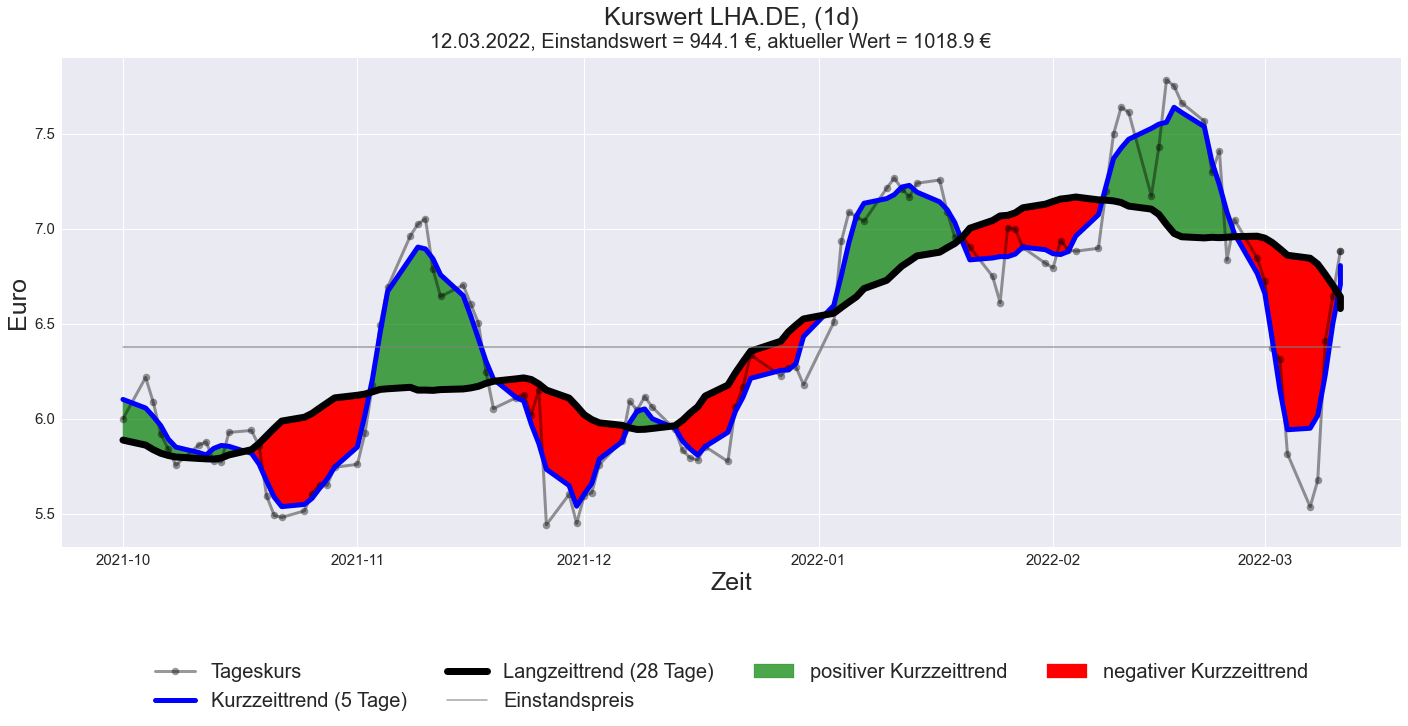

In [39]:
plt.figure(figsize=(24,9))
plt.style.use('seaborn')
plt.grid(True)


plt.plot(df["Date"], df["Kurs"], marker='.', linestyle='-', alpha=0.4,
        color="black", linewidth=3, label = "Tageskurs", markersize=15)


plt.plot(df["Date"], df["Kurs_mean_1"], marker='', linestyle='-',
        color="blue", linewidth=5, label = f'Kurzzeittrend ({rolling_window1} Tage)', markersize=10)

plt.plot(df["Date"], df["Kurs_mean_2"], marker='', linestyle='-',
        color="black", linewidth=7, label = f'Langzeittrend ({rolling_window2} Tage)', markersize=10)


plt.fill_between(df["Date"], df["Kurs_mean_1"], df["Kurs_mean_2"], color='green', alpha=0.7,
                 label=f'positiver Kurzzeittrend', interpolate=True,  where=(df["Kurs_mean_1"] > df["Kurs_mean_2"]))

plt.fill_between(df["Date"], df["Kurs_mean_1"], df["Kurs_mean_2"], color='red', alpha=1,
                 label=f'negativer Kurzzeittrend', interpolate=True, where=(df["Kurs_mean_1"] < df["Kurs_mean_2"]))

# Einstandspreis
plt.plot(df["Date"], df["Einstandspreis"], marker='', linestyle='-', alpha = 0.7,
        color="grey", linewidth=1.5, label = f'Einstandspreis', markersize=10)


# Legende
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=4,
           fontsize=20)

# Titel
plt.title(f'Kurswert {aktie}, ({interval})\n', fontsize=25)
plt.suptitle(f'{today}, Einstandswert = {Einstandswert} €, aktueller Wert = {aktueller_Wert} €', fontsize=20, y=0.92)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

plt.ylabel("Euro", fontsize=25)
plt.xlabel("Zeit", fontsize=25)


plt.savefig(f'D:\\Github\\Aktien\\Output\\{today} {aktie}.png', dpi=300, bbox_inches='tight')

In [40]:
# import numpy as np

# # Now your list 
# list = [('2018-10-29', 6.1925), ('2018-10-29', 6.195), ('2018-10-29', 1.95833333333333), 
#         ('2018-10-29', 1.785), ('2018-10-29', 3.05), ('2018-10-29', 1.30666666666667), 
#         ('2018-10-29', 1.6325), ('2018-10-30', 1.765), ('2018-10-30', 1.265), 
#         ('2018-10-30', 2.1125), ('2018-10-30', 2.16714285714286), ('2018-10-30', 1.485), 
#         ('2018-10-30', 1.72), ('2018-10-30', 2.754), ('2018-10-30', 1.79666666666667), 
#         ('2018-10-30', 1.27833333333333), ('2018-10-30', 3.48), ('2018-10-30', 6.19), 
#         ('2018-10-30', 6.235), ('2018-10-30', 6.11857142857143), ('2018-10-30', 6.088), 
#         ('2018-10-30', 4.3), ('2018-10-30', 7.80666666666667), 
#         ('2018-10-30', 7.78333333333333), ('2018-10-30', 10.9766666666667), 
#         ('2018-10-30', 2.19), ('2018-10-30', 1.88)]

# # Create a single pandas DataFrame
# df = pd.DataFrame(list)

# # Make it into a Time Series with 'date' and 'value' columns
# ts = pd.DataFrame(list, columns=['date', 'value'])

# #print it to check it
# ts.head(10)

# # Now separate it into x and y lists

# x = ts['date']
# y = ts['value'].astype(float)

# # Create a sequance of integers from 0 to x.size to use in np.polyfit() call
# x_seq = np.arange(x.size) # should give you [ 0  1  2  3  4 ... 26]

# # call numpy polyfit() method with x_seq, y 
# fit = np.polyfit(x_seq, y, 1)
# fit_fn = np.poly1d(fit)

# print('Slope = ', fit[0], ", ","Intercept = ", fit[1])
# print(fit_fn)